<a href="https://colab.research.google.com/github/sudeep-009/Bike-Sharing-Demand-Prediction/blob/dev/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [234]:
!pip install mlxtend

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Bike Sharing Demand Prediction/SeoulBikeData.csv',encoding= 'unicode_escape')

## **Understanding Data**

In [6]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [7]:
# shape of dataset
df.shape

(8760, 14)

* Dataset consists of 8760 records.
* Dataset consists of 14 features.

In [8]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

* No null values is present in the dataset.

In [9]:
len(df[df.duplicated(keep='first')])

0

* No duplicate value is present in the dataset.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [11]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print('-------------------')

Date
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '04/02/2018' '05/02/2018' '06/02/2018' '07/02/2018' '08/02/2018'
 '09/02/2018' '10/02/2018' '11/02/2018' '12/02/2018' '13/02/2018'
 '14/

## **EDA and Features Engineering.**

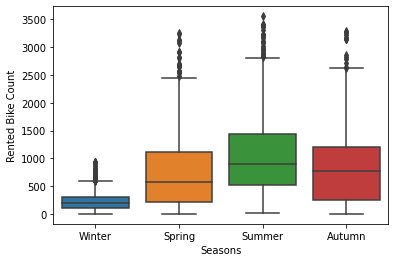

In [12]:
# feature engineering and eda
sns.boxplot(x=df['Seasons'],y=df['Rented Bike Count'])
plt.show()

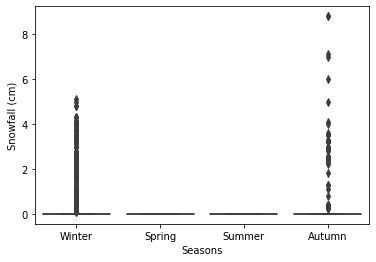

In [13]:
sns.boxplot(x=df['Seasons'],y=df['Snowfall (cm)'])
plt.show()

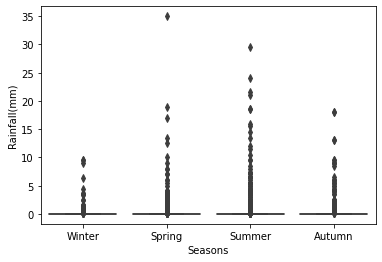

In [14]:
sns.boxplot(x=df['Seasons'],y=df['Rainfall(mm)'])
plt.show()

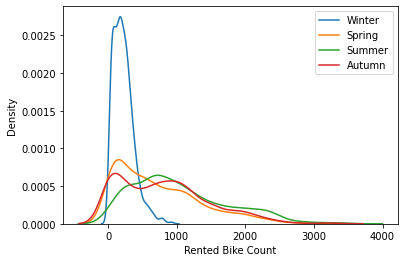

In [15]:
sns.kdeplot(x=df[df['Seasons']=='Winter']['Rented Bike Count'],label='Winter')
sns.kdeplot(x=df[df['Seasons']=='Spring']['Rented Bike Count'],label='Spring')
sns.kdeplot(x=df[df['Seasons']=='Summer']['Rented Bike Count'],label='Summer')
sns.kdeplot(x=df[df['Seasons']=='Autumn']['Rented Bike Count'],label='Autumn')
plt.legend()
plt.show()

* Count of Rented Bike during the winter is very less as compared to other season.

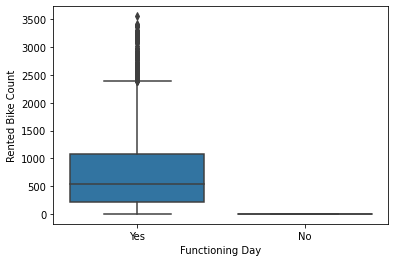

In [16]:
sns.boxplot(x=df['Functioning Day'],y=df['Rented Bike Count'])
plt.show()

In [19]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [20]:
func_day = df.groupby(['Functioning Day'])['Rented Bike Count'].median().reset_index()
func_day


,Functioning Day,Rented Bike Count
0,No,0.0
1,Yes,542.0


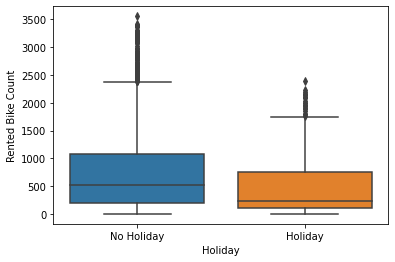

In [21]:
sns.boxplot(x=df['Holiday'],y=df['Rented Bike Count'])
plt.show()

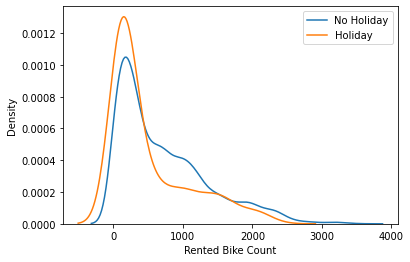

In [22]:
sns.kdeplot(x=df[df['Holiday']=='No Holiday']['Rented Bike Count'],label='No Holiday')
sns.kdeplot(x=df[df['Holiday']=='Holiday']['Rented Bike Count'],label='Holiday')
plt.legend()
plt.show()

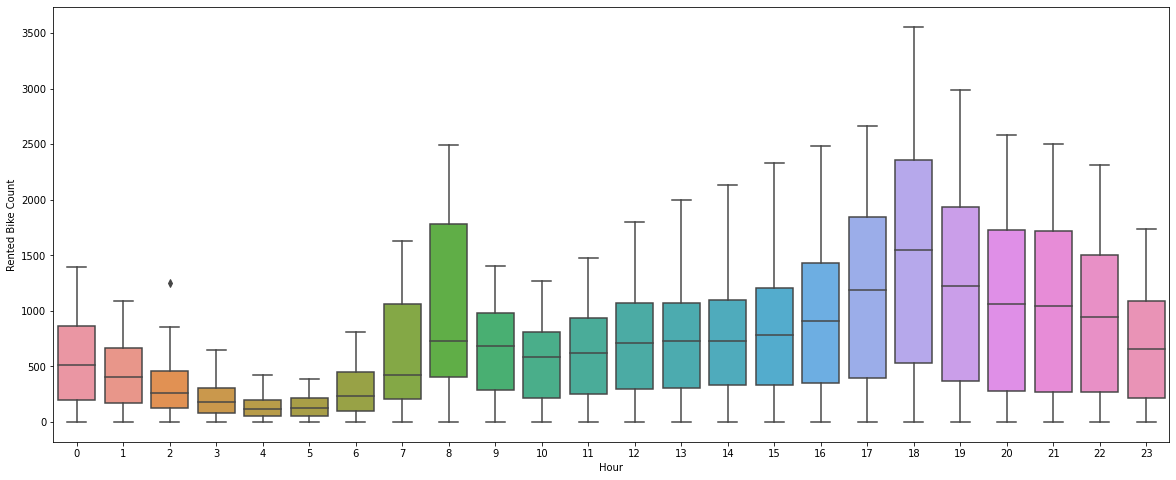

In [23]:
plt.figure(figsize=(20,8))
sns.boxplot(x=df['Hour'],y=df['Rented Bike Count'])
plt.show()

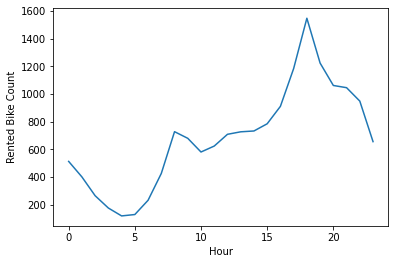

In [24]:
df_hour = df.groupby('Hour').agg({'Rented Bike Count': 'median'}).reset_index().sort_values('Hour')
sns.lineplot(x=df_hour['Hour'],y=df_hour['Rented Bike Count'])
plt.show()

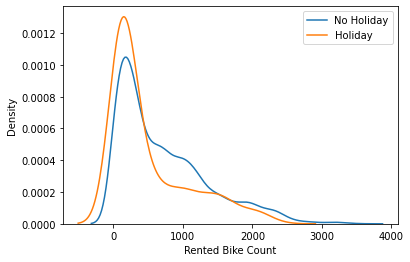

In [25]:
sns.kdeplot(x=df[df['Holiday']=='No Holiday']['Rented Bike Count'],label='No Holiday')
sns.kdeplot(x=df[df['Holiday']=='Holiday']['Rented Bike Count'],label='Holiday')
plt.legend()
plt.show()

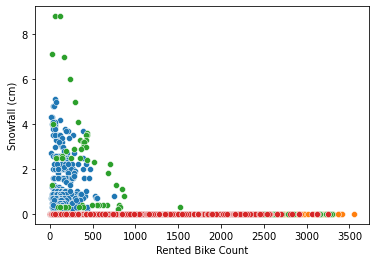

In [26]:
# snowfall vs ranted bike count
sns.scatterplot(x=df[df['Seasons']=='Winter']['Rented Bike Count'],y=df['Snowfall (cm)'])
sns.scatterplot(x=df[df['Seasons']=='Summer']['Rented Bike Count'],y=df['Snowfall (cm)'])
sns.scatterplot(x=df[df['Seasons']=='Autumn']['Rented Bike Count'],y=df['Snowfall (cm)'])
sns.scatterplot(x=df[df['Seasons']=='Spring']['Rented Bike Count'],y=df['Snowfall (cm)'])

plt.show()

In [27]:
# removing outlier
df = df[df['Snowfall (cm)']<4]

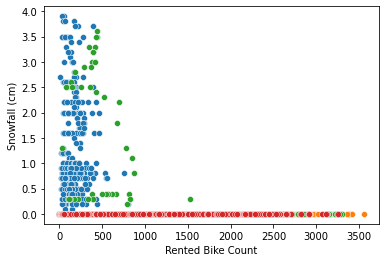

In [28]:
# snowfall vs ranted bike count
sns.scatterplot(x=df[df['Seasons']=='Winter']['Rented Bike Count'],y=df['Snowfall (cm)'])
sns.scatterplot(x=df[df['Seasons']=='Summer']['Rented Bike Count'],y=df['Snowfall (cm)'])
sns.scatterplot(x=df[df['Seasons']=='Autumn']['Rented Bike Count'],y=df['Snowfall (cm)'])
sns.scatterplot(x=df[df['Seasons']=='Spring']['Rented Bike Count'],y=df['Snowfall (cm)'])

plt.show()

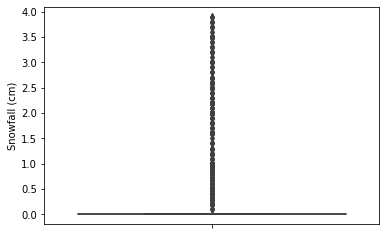

In [29]:
sns.boxplot(y=df['Snowfall (cm)'])
plt.show()

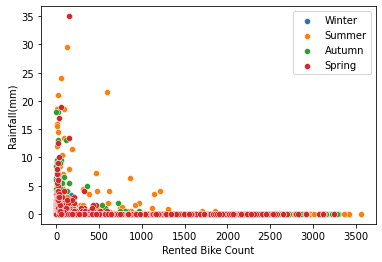

In [30]:
sns.scatterplot(x=df[df['Seasons']=='Winter']['Rented Bike Count'],y=df['Rainfall(mm)'],label='Winter')
sns.scatterplot(x=df[df['Seasons']=='Summer']['Rented Bike Count'],y=df['Rainfall(mm)'],label='Summer')
sns.scatterplot(x=df[df['Seasons']=='Autumn']['Rented Bike Count'],y=df['Rainfall(mm)'],label='Autumn')
sns.scatterplot(x=df[df['Seasons']=='Spring']['Rented Bike Count'],y=df['Rainfall(mm)'],label='Spring')
plt.legend()
plt.show()

In [31]:
# removing outlier
df = df[df['Rainfall(mm)']<20]


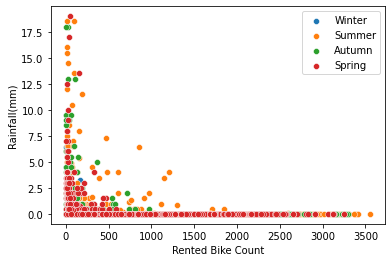

In [32]:
sns.scatterplot(x=df[df['Seasons']=='Winter']['Rented Bike Count'],y=df['Rainfall(mm)'],label='Winter')
sns.scatterplot(x=df[df['Seasons']=='Summer']['Rented Bike Count'],y=df['Rainfall(mm)'],label='Summer')
sns.scatterplot(x=df[df['Seasons']=='Autumn']['Rented Bike Count'],y=df['Rainfall(mm)'],label='Autumn')
sns.scatterplot(x=df[df['Seasons']=='Spring']['Rented Bike Count'],y=df['Rainfall(mm)'],label='Spring')
plt.legend()
plt.show()

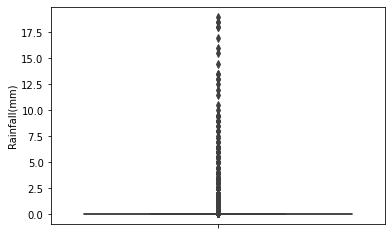

In [33]:
sns.boxplot(y=df['Rainfall(mm)'])
plt.show()

No handles with labels found to put in legend.


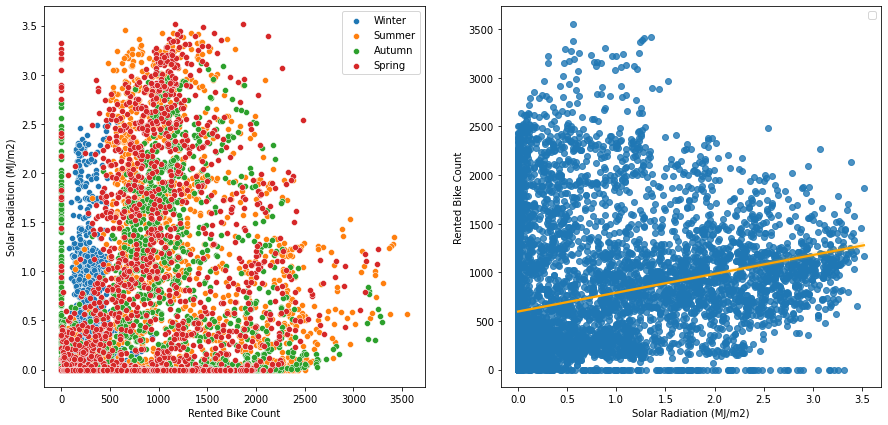

In [39]:


fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,7))
sns.scatterplot(x=df[df['Seasons']=='Winter']['Rented Bike Count'],y=df['Solar Radiation (MJ/m2)'],label='Winter',ax=ax1)
sns.scatterplot(x=df[df['Seasons']=='Summer']['Rented Bike Count'],y=df['Solar Radiation (MJ/m2)'],label='Summer',ax=ax1)
sns.scatterplot(x=df[df['Seasons']=='Autumn']['Rented Bike Count'],y=df['Solar Radiation (MJ/m2)'],label='Autumn',ax=ax1)
sns.scatterplot(x=df[df['Seasons']=='Spring']['Rented Bike Count'],y=df['Solar Radiation (MJ/m2)'],label='Spring',ax=ax1)
sns.regplot(x=df['Solar Radiation (MJ/m2)'],y=df['Rented Bike Count'],line_kws={'color': 'orange'},ax=ax2)
plt.legend()
plt.show()

In [85]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Seasons', 'Holiday',
       'Functioning Day', 'Month', 'Day of Week', 'Quarter'],
      dtype='object')

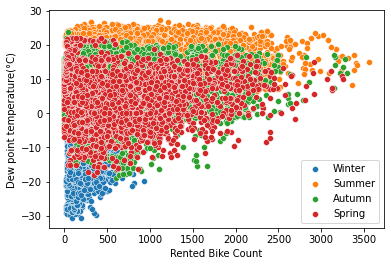

In [109]:
sns.scatterplot(x=df[df['Seasons']=='Winter']['Rented Bike Count'],y=df['Dew point temperature(°C)'],label='Winter')
sns.scatterplot(x=df[df['Seasons']=='Summer']['Rented Bike Count'],y=df['Dew point temperature(°C)'],label='Summer')
sns.scatterplot(x=df[df['Seasons']=='Autumn']['Rented Bike Count'],y=df['Dew point temperature(°C)'],label='Autumn')
sns.scatterplot(x=df[df['Seasons']=='Spring']['Rented Bike Count'],y=df['Dew point temperature(°C)'],label='Spring')
plt.legend()
plt.show()

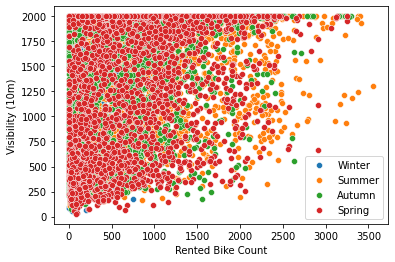

In [110]:
sns.scatterplot(x=df[df['Seasons']=='Winter']['Rented Bike Count'],y=df['Visibility (10m)'],label='Winter')
sns.scatterplot(x=df[df['Seasons']=='Summer']['Rented Bike Count'],y=df['Visibility (10m)'],label='Summer')
sns.scatterplot(x=df[df['Seasons']=='Autumn']['Rented Bike Count'],y=df['Visibility (10m)'],label='Autumn')
sns.scatterplot(x=df[df['Seasons']=='Spring']['Rented Bike Count'],y=df['Visibility (10m)'],label='Spring')
plt.legend()
plt.show()

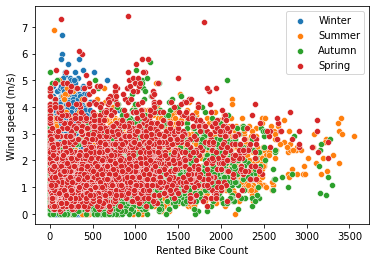

In [111]:
sns.scatterplot(x=df[df['Seasons']=='Winter']['Rented Bike Count'],y=df['Wind speed (m/s)'],label='Winter')
sns.scatterplot(x=df[df['Seasons']=='Summer']['Rented Bike Count'],y=df['Wind speed (m/s)'],label='Summer')
sns.scatterplot(x=df[df['Seasons']=='Autumn']['Rented Bike Count'],y=df['Wind speed (m/s)'],label='Autumn')
sns.scatterplot(x=df[df['Seasons']=='Spring']['Rented Bike Count'],y=df['Wind speed (m/s)'],label='Spring')
plt.legend()
plt.show()

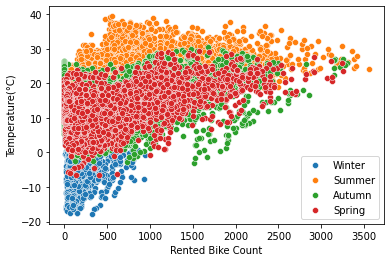

In [112]:
sns.scatterplot(x=df[df['Seasons']=='Winter']['Rented Bike Count'],y=df['Temperature(°C)'],label='Winter')
sns.scatterplot(x=df[df['Seasons']=='Summer']['Rented Bike Count'],y=df['Temperature(°C)'],label='Summer')
sns.scatterplot(x=df[df['Seasons']=='Autumn']['Rented Bike Count'],y=df['Temperature(°C)'],label='Autumn')
sns.scatterplot(x=df[df['Seasons']=='Spring']['Rented Bike Count'],y=df['Temperature(°C)'],label='Spring')
plt.legend()
plt.show()

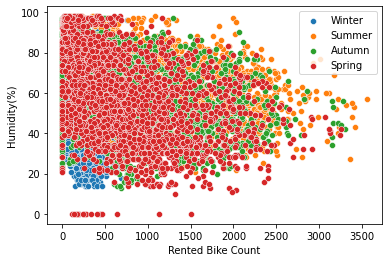

In [113]:
sns.scatterplot(x=df[df['Seasons']=='Winter']['Rented Bike Count'],y=df['Humidity(%)'],label='Winter')
sns.scatterplot(x=df[df['Seasons']=='Summer']['Rented Bike Count'],y=df['Humidity(%)'],label='Summer')
sns.scatterplot(x=df[df['Seasons']=='Autumn']['Rented Bike Count'],y=df['Humidity(%)'],label='Autumn')
sns.scatterplot(x=df[df['Seasons']=='Spring']['Rented Bike Count'],y=df['Humidity(%)'],label='Spring')
plt.legend()
plt.show()

#### **Correlation between target variable and continuous features**

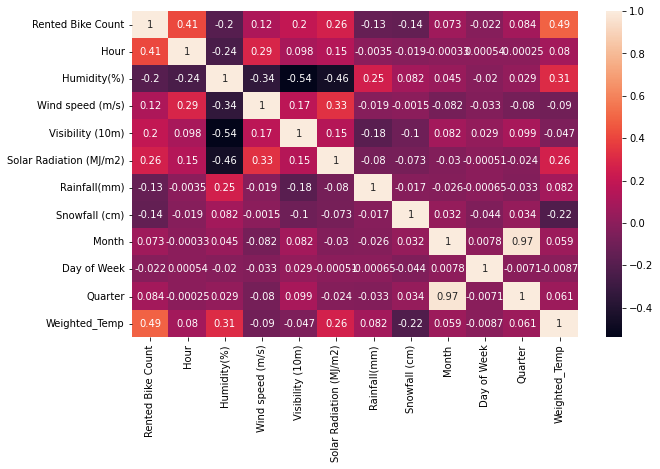

In [54]:
continuous_features = [i for i in df.columns if df[i].dtype != object]
plt.figure(figsize=(10,6))
sns.heatmap(df[continuous_features].corr(),annot=True)
plt.show()


In [41]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day of Week'] = df['Date'].dt.dayofweek
df['Quarter'] = df['Date'].dt.quarter

In [42]:
# dropping date column
df.drop('Date',axis=1,inplace=True)

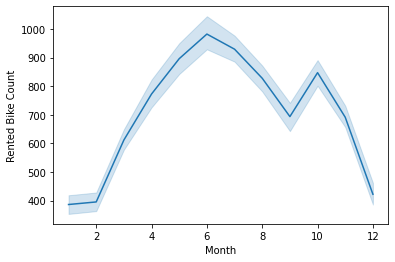

In [43]:
# df_month = df.groupby('Month').agg({'Rented Bike Count': 'median'}).reset_index().sort_values('Rented Bike Count')
sns.lineplot(x=df['Month'],y=df['Rented Bike Count'])
plt.show()

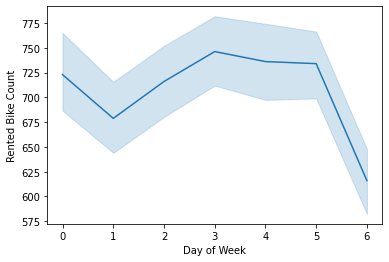

In [44]:
# df_month = df.groupby('Day of Week').agg({'Rented Bike Count': 'median'}).reset_index().sort_values('Day of Week')
sns.lineplot(x=df['Day of Week'],y=df['Rented Bike Count'])
plt.show()

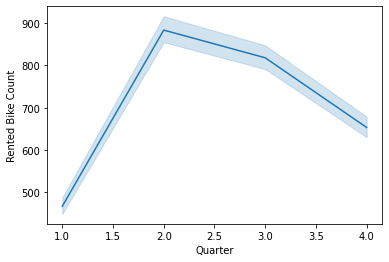

In [45]:
sns.lineplot(x=df['Quarter'],y=df['Rented Bike Count'])
plt.show()

####**Checking Multi Collinearity**

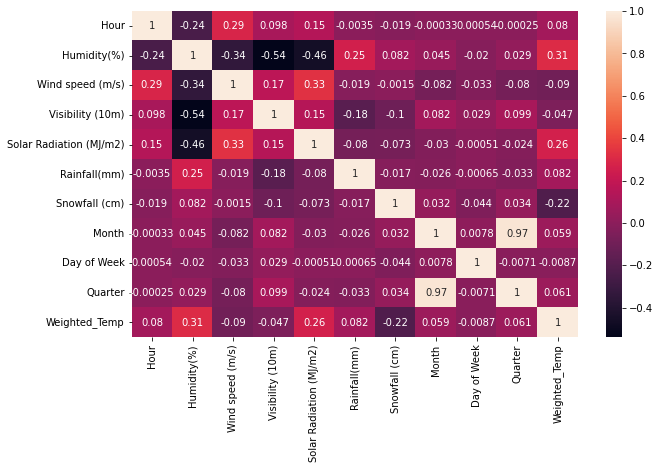

In [52]:
continuous_features = [i for i in df.columns if df[i].dtype != object and i != 'Rented Bike Count']
plt.figure(figsize=(10,6))
sns.heatmap(df[continuous_features].corr(),annot=True)
plt.show()

In [49]:
df['Weighted_Temp'] = df['Temperature(°C)']*0.65 + df['Dew point temperature(°C)']*0.35

In [50]:
df.drop(['Temperature(°C)','Dew point temperature(°C)'],inplace=True,axis=1)

In [53]:
# vif for checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
vif_data = pd.DataFrame()
vif_data["feature"] = df[continuous_features].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df[continuous_features].values, i)
                          for i in range(len(df[continuous_features].columns))]
  
print(vif_data)

                    feature         VIF
0                      Hour    3.957654
1               Humidity(%)    7.741176
2          Wind speed (m/s)    4.673266
3          Visibility (10m)    6.065446
4   Solar Radiation (MJ/m2)    2.186288
5              Rainfall(mm)    1.098686
6             Snowfall (cm)    1.127811
7                     Month   78.804455
8               Day of Week    3.175678
9                   Quarter  102.240293
10            Weighted_Temp    2.501081


In [55]:
# dropping Date and Dew point temperature(°C) and quarter feature
df.drop(['Month'],inplace=True,axis=1)

In [56]:
# vif for checking multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
features = [i for i in df.columns if df[i].dtype != object and i != 'Rented Bike Count']  
vif_data = pd.DataFrame()
vif_data["feature"] = df[features].columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df[features].values, i)
                          for i in range(len(df[features].columns))]
  
print(vif_data)

                   feature       VIF
0                     Hour  3.949818
1              Humidity(%)  7.425551
2         Wind speed (m/s)  4.666212
3         Visibility (10m)  5.842470
4  Solar Radiation (MJ/m2)  2.173856
5             Rainfall(mm)  1.098253
6            Snowfall (cm)  1.127803
7              Day of Week  3.173684
8                  Quarter  5.941292
9            Weighted_Temp  2.496623


In [57]:
df.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day of Week,Quarter,Weighted_Temp
0,254,0,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,-9.540
1,204,1,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,-9.735
2,173,2,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,-10.095
3,107,3,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,-10.190
4,78,4,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday,Yes,3,1,-10.410


In [58]:
df_final = df.copy()

In [140]:
Mean_encoded_Hour = df_final.groupby(['Hour'])['Rented Bike Count'].mean().to_dict()
  
df_final['Hour'] =  df_final['Hour'].map(Mean_encoded_Hour)

In [59]:
df_new = pd.get_dummies(df_final, columns=['Seasons','Holiday','Functioning Day','Day of Week','Quarter'])

In [60]:
df_new

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Weighted_Temp,Seasons_Autumn,...,Day of Week_1,Day of Week_2,Day of Week_3,Day of Week_4,Day of Week_5,Day of Week_6,Quarter_1,Quarter_2,Quarter_3,Quarter_4
0,254,0,37,2.2,2000,0.0,0.0,0.0,-9.540,0,...,0,0,1,0,0,0,1,0,0,0
1,204,1,38,0.8,2000,0.0,0.0,0.0,-9.735,0,...,0,0,1,0,0,0,1,0,0,0
2,173,2,39,1.0,2000,0.0,0.0,0.0,-10.095,0,...,0,0,1,0,0,0,1,0,0,0
3,107,3,40,0.9,2000,0.0,0.0,0.0,-10.190,0,...,0,0,1,0,0,0,1,0,0,0
4,78,4,36,2.3,2000,0.0,0.0,0.0,-10.410,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,34,2.6,1894,0.0,0.0,0.0,-0.875,1,...,0,0,0,1,0,0,0,0,0,1
8756,764,20,37,2.3,2000,0.0,0.0,0.0,-1.255,1,...,0,0,0,1,0,0,0,0,0,1
8757,694,21,39,0.3,1968,0.0,0.0,0.0,-1.775,1,...,0,0,0,1,0,0,0,0,0,1
8758,712,22,41,1.0,1859,0.0,0.0,0.0,-2.065,1,...,0,0,0,1,0,0,0,0,0,1


### **Linear Regression**

In [88]:
df_reg = df_final.copy()

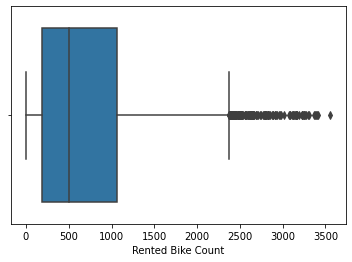

In [89]:
plt.figure()
sns.boxplot(x=df_new['Rented Bike Count'])
plt.show()

In [90]:
# dropping outlier
df_reg = df_reg[df_reg['Rented Bike Count']<3000]

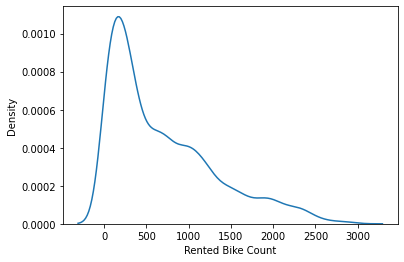

1.0611260315756594


In [91]:
from scipy.stats import skew
plt.figure()
sns.kdeplot(x=df_reg['Rented Bike Count'])
plt.show()
print(skew(df_reg['Rented Bike Count']))

In [92]:
df_reg['Rented Bike Count'] = np.sqrt(df_reg['Rented Bike Count'])

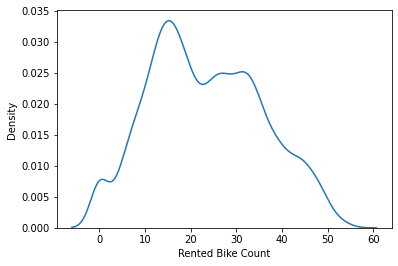

0.20103917196785992


In [93]:
from scipy.stats import skew
plt.figure()
sns.kdeplot(x=df_reg['Rented Bike Count'])
plt.show()
print(skew(df_reg['Rented Bike Count']))

In [94]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X = df_new[[i for i in df_new.columns if i != 'Rented Bike Count']]
Y = df_new['Rented Bike Count']

**Sequential Forward Selection and Backward elimination approach for Feature Selection**

In [71]:
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

In [72]:
linReg = LinearRegression()
sfs = SFS(estimator=linReg,       # Use logistic regression as our classifier
          k_features=(6, 10),  # Consider any feature combination between 1 and 4
          forward=True,       # Set forward to True when we want to perform SFS
          scoring='neg_mean_squared_error', # The metric to use to evaluate the classifier is accuracy 
          verbose = True,
          cv=5)               # The number of cross-validations to perform is 5


In [73]:
sfs = sfs.fit(X, Y)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.3s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.3s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.4s finished
Features: 3/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.3s finished
Features: 4/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    0.3s finished
Features: 5/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.6s finished
Features: 6/10[Parallel(

In [74]:
print('Best accuracy score: %.2f' % sfs.k_score_)   
print('Best subset (indices):', sfs.k_feature_idx_)                                                     
print('Best subset (corresponding names):', sfs.k_feature_names_) 


Best accuracy score: -231279.38
Best subset (indices): (0, 1, 4, 5, 7, 11, 14, 22, 23, 25)
Best subset (corresponding names): ('Hour', 'Humidity(%)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Weighted_Temp', 'Seasons_Winter', 'Functioning Day_No', 'Day of Week_6', 'Quarter_1', 'Quarter_3')


In [76]:
X = df_new[['Hour', 'Humidity(%)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Weighted_Temp', 'Seasons_Winter', 'Functioning Day_No', 'Day of Week_6', 'Quarter_1', 'Quarter_3'
]]

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.8,random_state=42)

In [96]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [97]:
reg = LinearRegression()
reg.fit(X_train,Y_train)

LinearRegression()

In [98]:
from sklearn.metrics import r2_score
y_pred = reg.predict(X_test)

In [99]:
print(r2_score(Y_test,y_pred))

0.5542369256390152


In [82]:
ytrainpred = reg.predict(X_train)

In [83]:
print(r2_score(Y_train,ytrainpred))

0.562720821779608


## **KNN Regressor**

In [100]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

In [101]:
knn = KNeighborsRegressor()

**Feature Selection for KNN using Forward Selection Approach**

In [102]:
sfs = SFS(estimator=knn,       # Use logistic regression as our classifier
          k_features=(8, 10),  # Consider any feature combination between 1 and 4
          forward=True,       # Set forward to True when we want to perform SFS
          scoring='neg_mean_squared_error', # The metric to use to evaluate the classifier is accuracy 
          verbose = True,
          cv=5)               # The number of cross-validations to perform is 5


In [103]:
X = df_new[[i for i in df_new.columns if i != 'Rented Bike Count']]
Y = df_new['Rented Bike Count']

In [104]:
#Training the model.
sfs = sfs.fit(X, Y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    7.5s finished
Features: 1/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    1.0s finished
Features: 2/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.2s finished
Features: 3/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.5s finished
Features: 4/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    1.7s finished
Features: 5/10[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    1.7s finished
Features: 6/10[Parallel(

In [105]:
print('Best accuracy score: %.2f' % sfs.k_score_)   
print('Best subset (indices):', sfs.k_feature_idx_)                                                     
print('Best subset (corresponding names):', sfs.k_feature_names_) 

Best accuracy score: -188014.27
Best subset (indices): (0, 1, 7, 8, 10, 11, 14, 15, 18, 20)
Best subset (corresponding names): ('Hour', 'Humidity(%)', 'Weighted_Temp', 'Seasons_Autumn', 'Seasons_Summer', 'Seasons_Winter', 'Functioning Day_No', 'Functioning Day_Yes', 'Day of Week_2', 'Day of Week_4')


In [107]:
X = df_new[['Hour', 'Weighted_Temp', 'Humidity(%)', 'Rainfall(mm)', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_Holiday', 'Functioning Day_No', 'Functioning Day_Yes', 'Day of Week_5'
]]
Y = df_new['Rented Bike Count']

In [108]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.8,random_state=42)

In [109]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [125]:
#List Hyperparameters that we want to tune.
leaf_size = list(range(16,50))
n_neighbors = list(range(8,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsRegressor()
#Use GridSearch
reg = GridSearchCV(knn_2, hyperparameters, cv=10)
#Fit the model
best_model = reg.fit(X_train,Y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 16
Best p: 1
Best n_neighbors: 9


In [126]:
y_pred = reg.predict(X_test)

In [127]:
y_predTrain = reg.predict(X_train)

In [128]:
print('Test accuracy is: ',r2_score(Y_test,y_pred))

Test accuracy is:  0.792698422731617


In [129]:
print('Train accuracy is: ',r2_score(Y_train,y_predTrain))

Train accuracy is:  0.8287849142044675


### **Random Forest Regressor**

In [130]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(random_state = 42)

In [131]:
# Number of trees in random forest

random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60],
 'max_features': [0.2,0.3,0.4,0.5],
 'min_samples_leaf': [  15, 20,25,30],
 'min_samples_split': [  15, 20, 25, 30, 35],
 'n_estimators': [2500]}

In [132]:
X = df_new[[i for i in df_new.columns if i != 'Rented Bike Count']]
Y = df_new['Rented Bike Count']

In [133]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.8,random_state=42)

In [134]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60],
                                        'max_features': [0.2, 0.3, 0.4, 0.5],
                                        'min_samples_leaf': [15, 20, 25, 30],
                                        'min_samples_split': [15, 20, 25, 30,
                                                              35],
                                        'n_estimators': [2500]},
                   random_state=42, verbose=2)

In [135]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 0.5,
 'min_samples_leaf': 15,
 'min_samples_split': 25,
 'n_estimators': 2500}

In [136]:
y_pred = rf_random.predict(X_test)
print(r2_score(Y_test,y_pred))

0.8154987303539083


In [137]:
y_predTrain = rf_random.predict(X_train)
print(r2_score(Y_train, y_predTrain))

0.8820090024836545


### **XGBoost Regressor**

In [138]:
param_grid = {
    'learning_rate': [0.01,0.02,0.04,0.06,0.08, 1.0],
    'n_estimators': [1000],
    'max_depth': [5,6,7,9,13,15],
    'subsample': [0.3,0.4,0.5,0.6,0.8],  # Change for big datasets
    'colsample': [0.3,0.4,0.5,0.6],  # Change for datasets with lots of features
    'min_samples_leaf': [10,20,30,40],
    'min_samples_split': [10,15,30,45],
    'gamma': [0,1,2,3,4,5]
}

In [140]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [141]:
xgb_random = RandomizedSearchCV(estimator = xgb, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
xgb_random.fit(X_train, Y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[21:29:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=3, estimator=XGBRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60],
                                        'max_features': [0.2, 0.3, 0.4, 0.5],
                                        'min_samples_leaf': [15, 20, 25, 30],
                                        'min_samples_split': [15, 20, 25, 30,
                                                              35],
                                        'n_estimators': [2500]},
                   random_state=42, verbose=2)

In [142]:
xgb_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 0.5,
 'min_samples_leaf': 20,
 'min_samples_split': 25,
 'n_estimators': 2500}

In [143]:
y_pred = xgb_random.predict(X_test)

In [144]:
y_predTrain = xgb_random.predict(X_train)

In [146]:
print(r2_score(Y_test,y_pred))

0.8523804974689718
